# Task 3 -  Missing Value + Outlier + ML

In [1]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
warnings.filterwarnings('ignore')

print('Modules Imported Successfully!')

Modules Imported Successfully!


In [2]:
#Importing Dataset
df = pd.read_csv('adult.csv')

print('Dataset loaded Successfully!')

Dataset loaded Successfully!


In [3]:
#Checking the shape of the dataset
df.shape

(48842, 15)

In [4]:
#Checking the first 5 rows of our data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#Checking the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#Statistical Info about our data
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#Checking unique values in each column
df.apply(lambda x: len(x.unique()))

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [8]:
#Check null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
#Checking for duplicate rows
df.duplicated().sum()

52

In [10]:
#Removing the duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
#eplacing ? with NaN
df[df == '?'] = np.nan

In [12]:
#Replacing ? with mode in features
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
#Checking the data before moving to EDA
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


## EDA

The maximum age is 90
The minimum age is 17


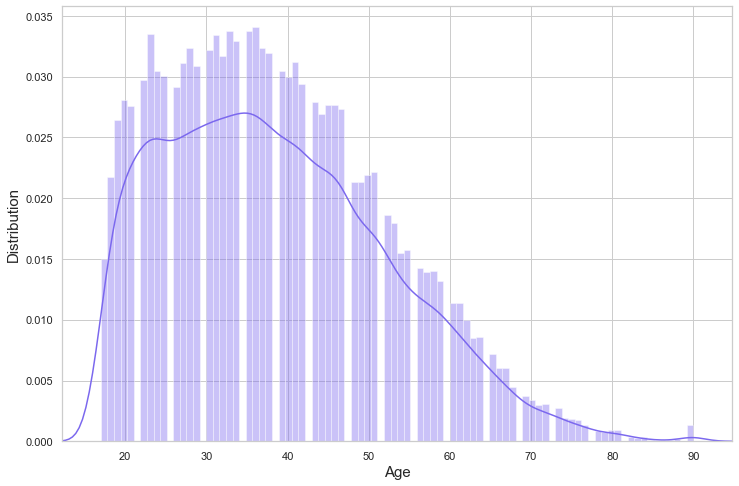

In [14]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

- Most of the adult lies between 20 - 50.

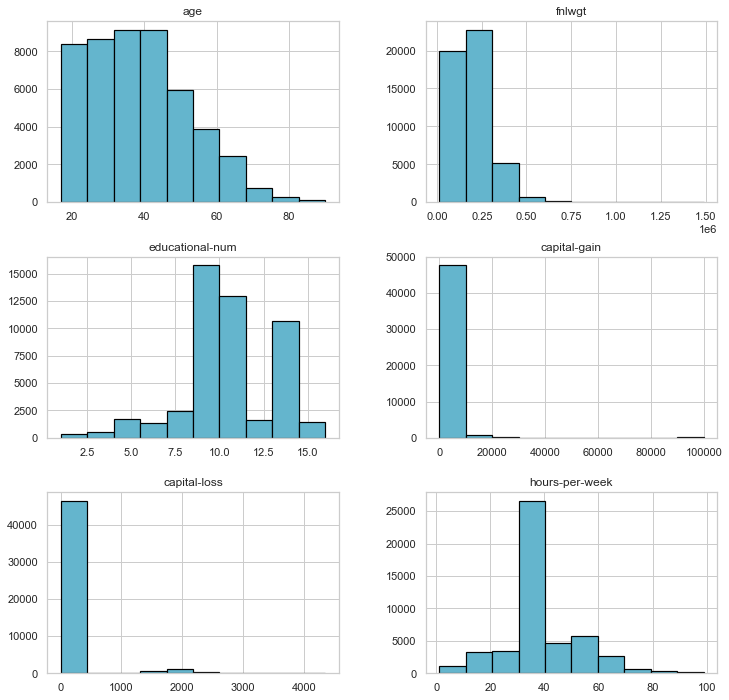

In [15]:
# Distribution of Different Features of the Dataset
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [16]:
# Checking the Difference between the values of the mean and median to get an idea about the amount of outliers
print (df['hours-per-week'].median())
print (df['hours-per-week'].mean())

40.0
40.42588645214183


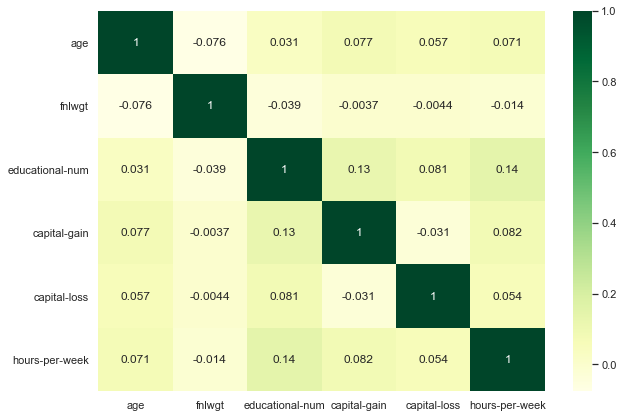

In [17]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True, color = 'blue', cmap = 'YlGn');

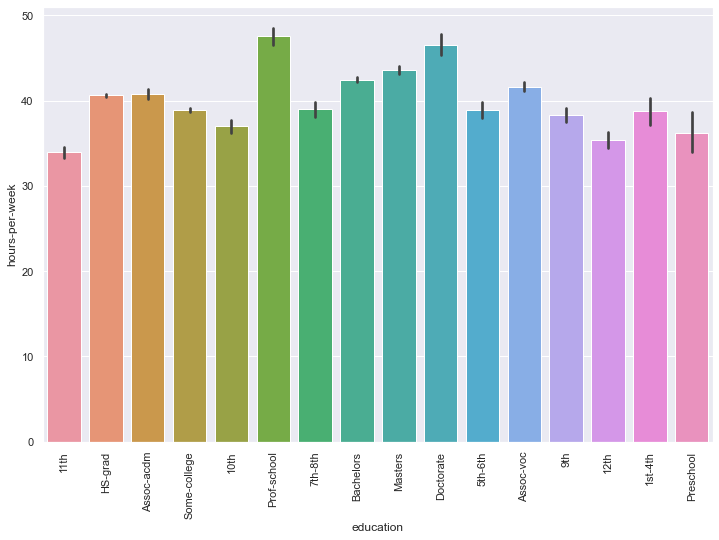

In [18]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['education'], y = df['hours-per-week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='gender', ylabel='hours-per-week'>

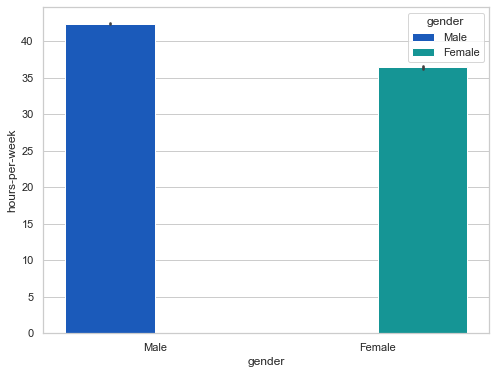

In [19]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df['gender'], y = df['hours-per-week'], data = df, hue = 'gender', palette = 'winter')

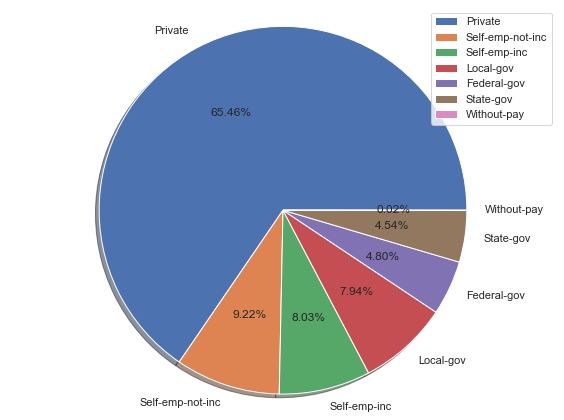

In [20]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df_ = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df_['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

OUTLIERS

<AxesSubplot:xlabel='age'>

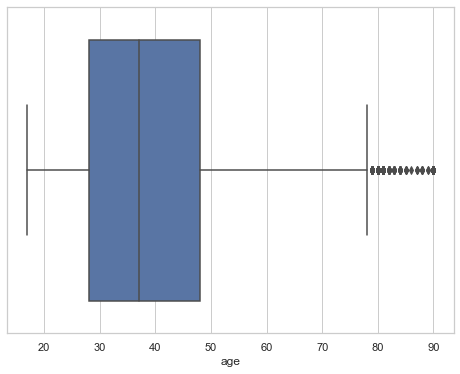

In [21]:
sns.boxplot(df.age)

- There are outliers in our age feature

In [22]:
#IQR range for outlier treatment
Q1=df.age.quantile(0.25)
Q3=df.age.quantile(0.75)
IQR=Q3-Q1

In [23]:
#Outlier treatment
age_low = Q1-1.5*IQR
age_high  = Q3+1.5*IQR

df = df[(df['age'] > age_low) & (df['age'] <= age_high)]

<AxesSubplot:xlabel='age'>

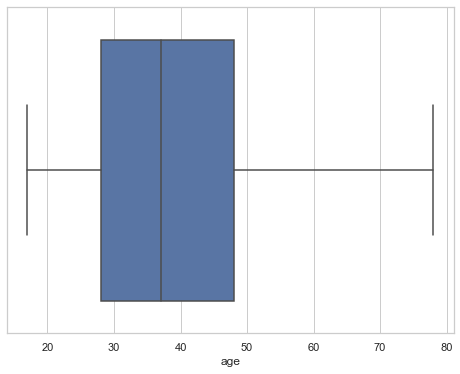

In [24]:
#Age boxplot after outlier treatment
sns.boxplot(df.age)

<AxesSubplot:xlabel='fnlwgt'>

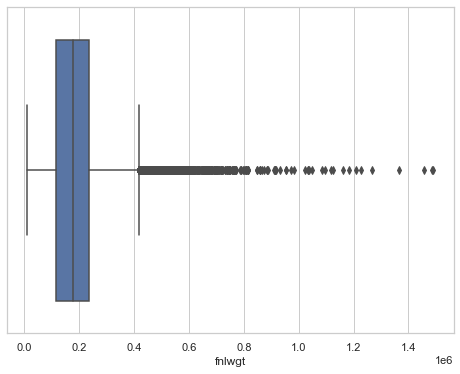

In [25]:
#Boxplot for final weight
sns.boxplot(df.fnlwgt)

In [26]:
#IQR range for outlier treatment
Q1=df.fnlwgt.quantile(0.25)
Q3=df.fnlwgt.quantile(0.75)
IQR=Q3-Q1

In [27]:
#Outlier treatment
fnlwgt_low = Q1-1.5*IQR
fnlwgt_high = Q3+1.25*IQR

df = df[(df['fnlwgt'] > fnlwgt_low) & (df['fnlwgt'] <= fnlwgt_high)]

<AxesSubplot:xlabel='fnlwgt'>

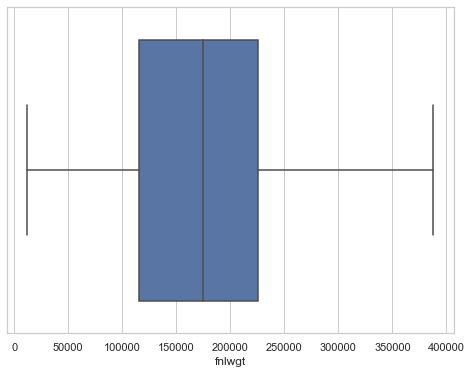

In [28]:
#Boxplot for final weight after outlier treatment
sns.boxplot(df.fnlwgt)

In [29]:
#Checking the data before moving to Preprocessing
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


## Preprocessing

In [30]:
#Splitting variable feature and target feature
X = df.drop(columns='income')
y = df['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [31]:
#Scaler Transform
sc = StandardScaler()
X['age'] = sc.fit_transform(X[['age']])
X['fnlwgt'] = sc.fit_transform(X[['fnlwgt']])
X['educational-num'] = sc.fit_transform(X[['educational-num']])
X['capital-gain'] = sc.fit_transform(X[['capital-gain']])
X['capital-loss'] = sc.fit_transform(X[['capital-loss']])
X['hours-per-week'] = sc.fit_transform(X[['hours-per-week']])

In [32]:
#treatment of categorical according to said doc
X['gender'] = X['gender'].apply(lambda x: 1 if x=='Male' else 0)
X = pd.get_dummies(X, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])

In [33]:
#Splitting then data in Training and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state =42)

## Model training

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = LR.predict(X_test)

In [36]:
LR_score = accuracy_score(y_test, y_pred)

In [37]:
print("Accuracy Score: ",round(LR_score*100,2))

Accuracy Score:  84.73


### Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)


GaussianNB()

In [39]:
y_pred = GNB.predict(X_test)

In [40]:
GNB_score = accuracy_score(y_test, y_pred)

In [41]:
print("Accuracy Score: ",round(GNB_score*100,2))

Accuracy Score:  57.95


### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = DT.predict(X_test)

In [44]:
DT_score = accuracy_score(y_test, y_pred)

In [45]:
print("Accuracy Score: ",round(DT_score*100,2))

Accuracy Score:  80.87


### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = RF.predict(X_test)

In [48]:
RF_score = accuracy_score(y_test, y_pred)

In [49]:
print("Accuracy Score: ",round(RF_score*100,2))

Accuracy Score:  84.83


### SVM

In [50]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [51]:
y_pred = SVM.predict(X_test)

In [52]:
SVM_score = accuracy_score(y_test, y_pred)

In [53]:
print("Accuracy Score: ",round(SVM_score*100,2))

Accuracy Score:  85.11


### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred = KNN.predict(X_test)

In [56]:
KNN_score = accuracy_score(y_test, y_pred)

In [57]:
print("Accuracy Score: ",round(KNN_score*100,2))

Accuracy Score:  82.74


### LGBM

In [58]:
import lightgbm as gbm
LGBM = gbm.LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

In [59]:
y_pred = LGBM.predict(X_test)

In [60]:
LGBM_score = accuracy_score(y_test, y_pred)

In [61]:
print("Accuracy Score: ",round(LGBM_score*100,2))

Accuracy Score:  87.0


### XGBoost

In [62]:
from xgboost import XGBClassifier
XGB = XGBClassifier(eval_metric='mlogloss')
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [63]:
y_pred = XGB.predict(X_test)

In [64]:
XGB_score = accuracy_score(y_test, y_pred)

In [65]:
print("Accuracy Score: ",round(XGB_score*100,2))

Accuracy Score:  86.74


## Evaluation

In [66]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'Light Gradient Boosting Machine', 'XGBoost Classifier'],
    'Score': [LR_score, GNB_score, DT_score, RF_score, SVM_score, KNN_score, LGBM_score, XGB_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
6,Light Gradient Boosting Machine,0.870034
7,XGBoost Classifier,0.867420
4,Support Vector Machines,0.851085
3,Random Forest,0.848275
0,Logistic Regression,0.847295
5,K - Nearest Neighbors,0.827365
2,Decision Tree,0.808677
1,Naive Bayes,0.579456


## Conclusion

- LGBM has the best accuracy with 87% on test data.